In [1]:
# this file shows how to process 3D movement directly 
# without performing alignment 
# in this case, "match_points_gui.py" must be run once to match points to track
# but no other pre-processing steps should be required (other than system calibration)

In [25]:
from hsflfm.util import load_dictionary, save_dictionary, MetadataManager
from hsflfm.processing import StrikeProcessor 

import os 
from tqdm import tqdm 
import numpy as np 
from matplotlib import pyplot as plt 

In [11]:
def get_save_filename(specimen_number, strike_number, save_folder):
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    spec_folder = save_folder + f"/{specimen_number}"
    if not os.path.exists(spec_folder):
        os.mkdir(spec_folder)
    filename = spec_folder + f"/strike_{int(strike_number)}_results.json"
    return filename

save_folder = "../ground_truth_results_2_20250804"

In [ ]:
specimen = "20250429_OB_1"
mm = MetadataManager(specimen) 
match_points = load_dictionary(mm.match_points_filename)
results = {
    "match_points": match_points, 
    "specimen_number": specimen,
}

for strike_number in tqdm(mm.strike_numbers):
    results["strike_number"] = strike_number
    save_filename = get_save_filename(specimen, strike_number, save_folder)

    processor = StrikeProcessor(results.copy()) 
    processor.get_flow_vectors() 
    processor.run_regression() 
    result_info = processor.condense_info(displacements_only=True) 
    save_dictionary(result_info, save_filename)


  0%|          | 0/5 [00:50<?, ?it/s]


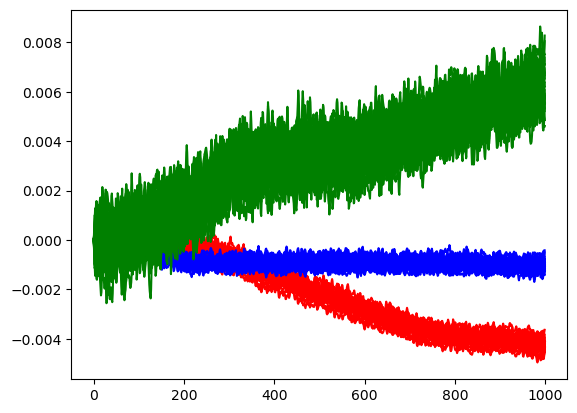

In [28]:
displacements = np.asarray(result_info["camera_point_displacements"])

for dim, color in enumerate(["red", "blue", "green"]):
    for p in displacements:
        plt.plot(p[:, dim], color=color)